In [35]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib
from PIL import Image
import json

np.random.seed(21)

In [56]:
def make_graphs(obj, title):
    epochs = len(obj.history['loss'])
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=16)  # Title for the whole figure
    make_graphs_loss(obj, epochs, axes[0])
    make_graphs_accuracy(obj, epochs, axes[1])
    plt.tight_layout()

def make_graphs_loss(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['loss']
    val_acc = obj.history['val_loss']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Loss', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Loss', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Training vs Validation Loss')
    ax.legend()

def make_graphs_accuracy(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['accuracy']
    val_acc = obj.history['val_accuracy']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Accuracy', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Accuracy', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs Validation Accuracy')
    ax.legend()

In [5]:
train_dataset = image_dataset_from_directory(
    r'images_sorted_tvts/train',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

val_data = image_dataset_from_directory(r'images_sorted_tvts/validation',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

Found 4420 files belonging to 37 classes.
Found 1478 files belonging to 37 classes.


In [46]:
VGG16_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
VGG16_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.vgg16.preprocess_input(x)  # scale the data
x = VGG16_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)   # only the weights in the dense layers will be trained
outputs = layers.Dense(37, activation="softmax")(x)     # only the weights in the dense layers will be trained
VGG16_Model = keras.Model(inputs, outputs)
VGG16_Model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

VGG16_hist = VGG16_Model.fit(train_dataset, epochs=20, validation_data= val_data)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.3415 - loss: 4.0925 - val_accuracy: 0.5041 - val_loss: 3.2892
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.8586 - loss: 0.7356 - val_accuracy: 0.6928 - val_loss: 1.8401
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9317 - loss: 0.4479 - val_accuracy: 0.7537 - val_loss: 1.9836
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9637 - loss: 0.3127 - val_accuracy: 0.7720 - val_loss: 1.8742
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9800 - loss: 0.2553 - val_accuracy: 0.7449 - val_loss: 2.2965
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9830 - loss: 0.2104 - val_accuracy: 0.7950 - val_loss: 1.8677
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9890 - loss: 0.1681 - val_accuracy: 0.7869 - val_loss: 1.9180
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9902 - loss: 0.1532 - 

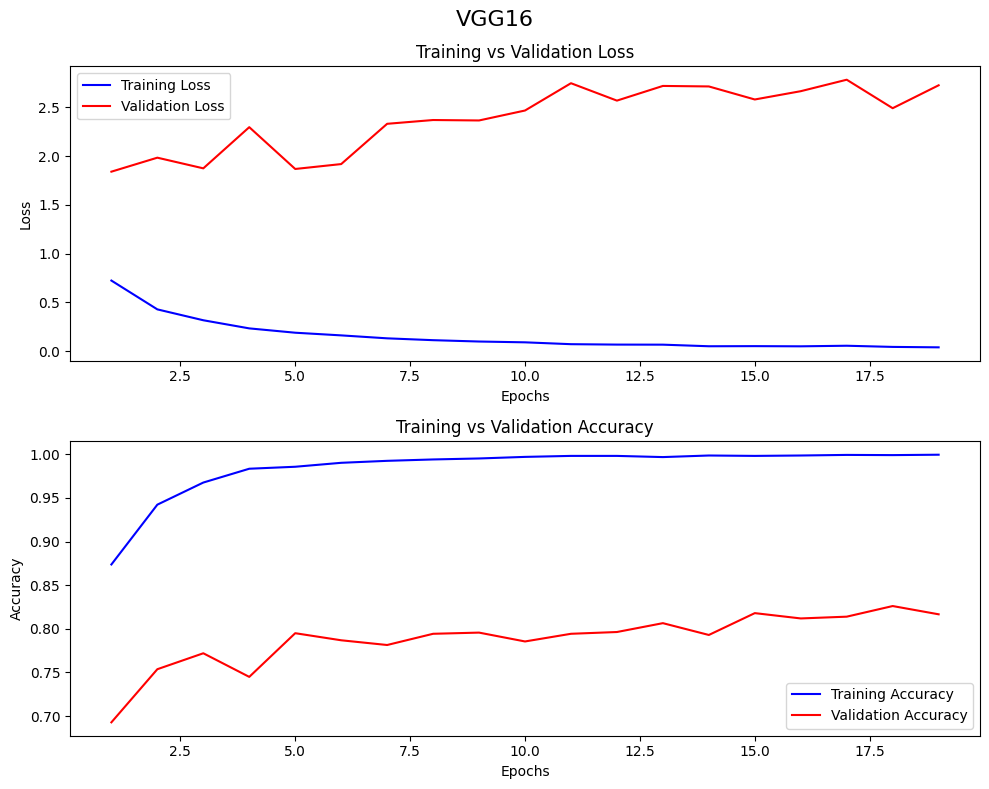

In [47]:
make_graphs(VGG16_hist, "VGG16")

In [48]:
# Xception Model
Xception_base = keras.applications.Xception(
    weights="imagenet",
    include_top=False)
Xception_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

Xception_hist = Xception_Model.fit(train_dataset, epochs=20, validation_data= val_data)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5298 - loss: 0.8202 - val_accuracy: 0.6712 - val_loss: 0.7675
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.8914 - loss: 0.1511 - val_accuracy: 0.8498 - val_loss: 0.1972
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9398 - loss: 0.0673 - val_accuracy: 0.8802 - val_loss: 0.1451
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9700 - loss: 0.0418 - val_accuracy: 0.8701 - val_loss: 0.1706
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9824 - loss: 0.0221 - val_accuracy: 0.9053 - val_loss: 0.1398
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9880 - loss: 0.0183 - val_accuracy: 0.8599 - val_loss: 0.2485
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9922 - loss: 0.0160 - val_accuracy: 0.9046 - val_loss: 0.1302
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9982 - loss: 0.0084 - 

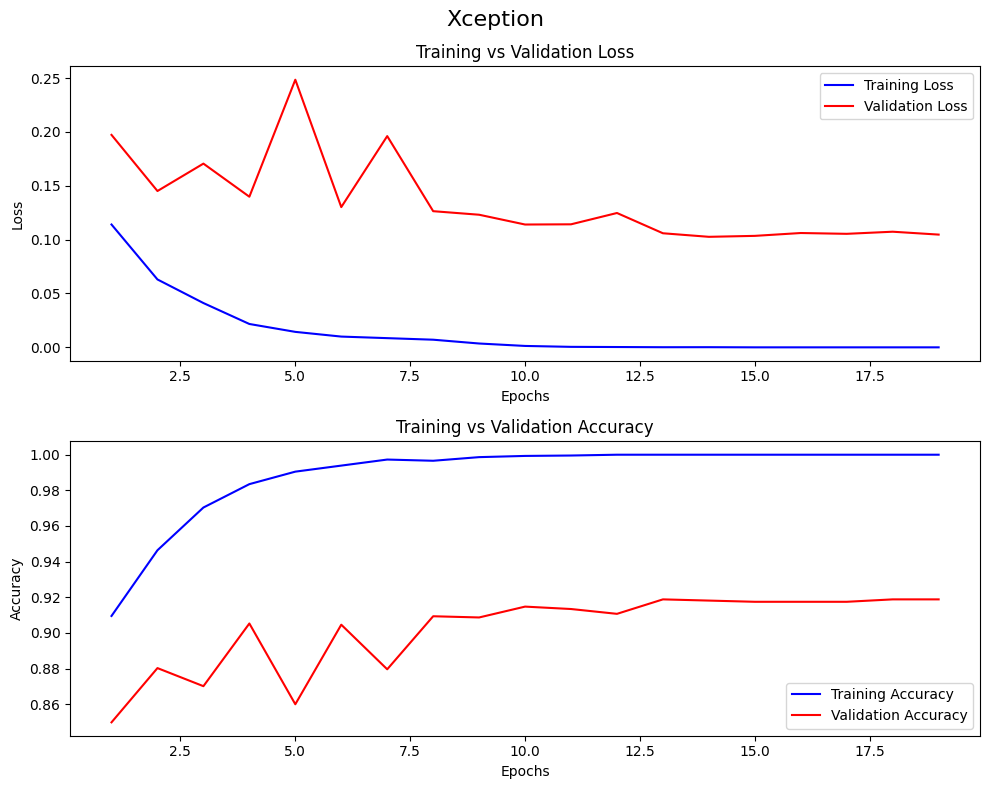

In [49]:
make_graphs(Xception_hist, "Xception")

In [50]:
# ResNet50 Model
ResNet50_base = keras.applications.ResNet50(
    weights="imagenet",
    include_top=False)
ResNet50_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.resnet50.preprocess_input(x)
x = ResNet50_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
outputs = layers.Dense(37, activation="softmax")(x)
ResNet50_Model = keras.Model(inputs, outputs)
ResNet50_Model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

ResNet50_hist = ResNet50_Model.fit(train_dataset, epochs=20, validation_data=val_data)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.3760 - loss: 2.4553 - val_accuracy: 0.4276 - val_loss: 2.4613
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9135 - loss: 0.3443 - val_accuracy: 0.8234 - val_loss: 0.5837
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9761 - loss: 0.1390 - val_accuracy: 0.8288 - val_loss: 0.7136
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9861 - loss: 0.0918 - val_accuracy: 0.8336 - val_loss: 0.7961
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9918 - loss: 0.0604 - val_accuracy: 0.8478 - val_loss: 0.7631
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9960 - loss: 0.0479 - val_accuracy: 0.8620 - val_loss: 0.6737
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9966 - loss: 0.0331 - val_accuracy: 0.8640 - val_loss: 0.6953
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9959 - loss: 0.0246 - val_ac

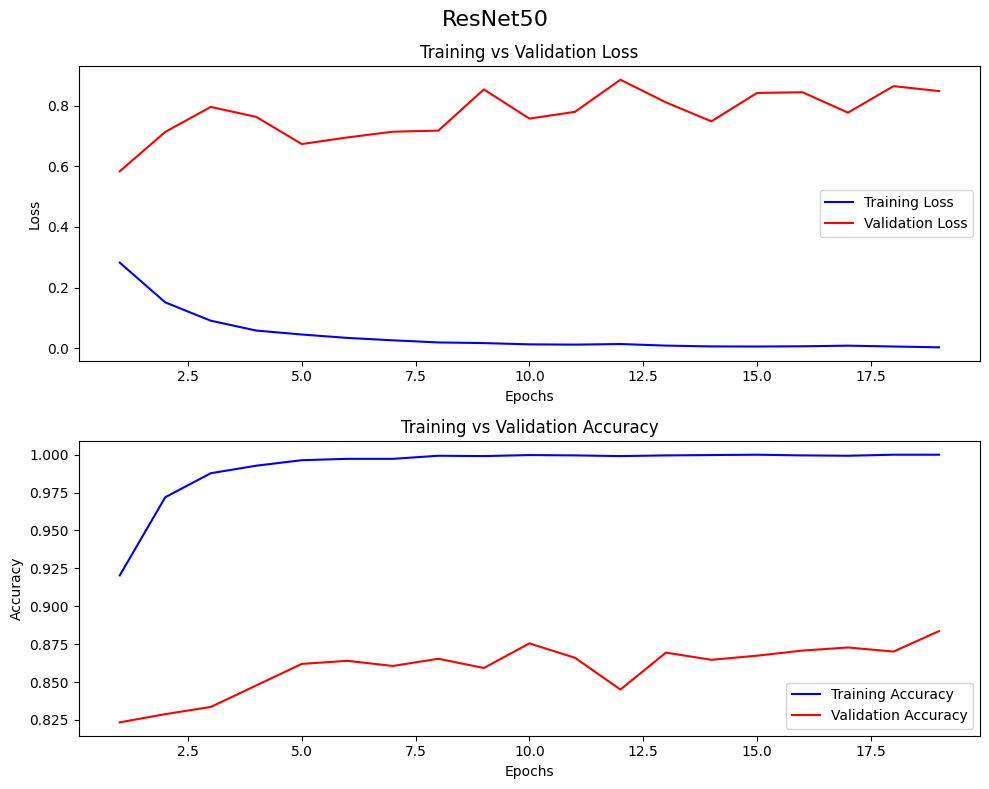

In [51]:
make_graphs(ResNet50_hist, "ResNet50")

In [52]:
# EfficientNetB5 Model
EfficientNetB5_base = keras.applications.EfficientNetB5(
    weights="imagenet",
    include_top=False)
EfficientNetB5_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.efficientnet.preprocess_input(x)
x = EfficientNetB5_base(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
outputs = layers.Dense(37, activation="softmax")(x)
EfficientNetB5_Model = keras.Model(inputs, outputs)
EfficientNetB5_Model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

EfficientNetB5_hist = EfficientNetB5_Model.fit(train_dataset, epochs=20, validation_data=val_data)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 108s 464ms/step - accuracy: 0.5491 - loss: 0.4886 - val_accuracy: 0.7666 - val_loss: 0.3166
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9012 - loss: 0.1272 - val_accuracy: 0.8566 - val_loss: 0.1488
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9437 - loss: 0.0711 - val_accuracy: 0.8755 - val_loss: 0.1498
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9659 - loss: 0.0465 - val_accuracy: 0.8065 - val_loss: 0.4354
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9711 - loss: 0.0576 - val_accuracy: 0.8857 - val_loss: 0.1396
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9806 - loss: 0.0310 - val_accuracy: 0.8714 - val_loss: 0.2045
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9910 - loss: 0.0221 - val_accuracy: 0.8789 - val_loss: 0.1597
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9901 - loss: 0.0234 

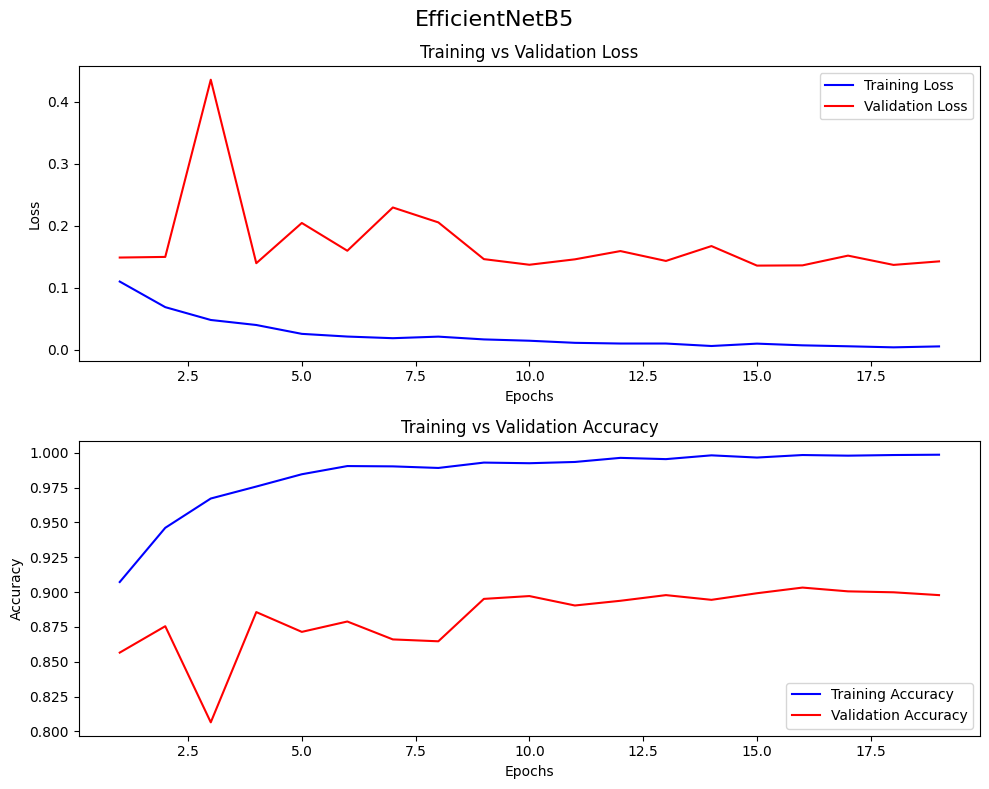

In [53]:
make_graphs(EfficientNetB5_hist, "EfficientNetB5")

In [6]:
# Run a bunch of models for Efficent Net, Xception
# Set callback to stop bad models early
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

# EfficientNetB5
# download
EfficientNetB5_base = keras.applications.EfficientNetB5(
weights="imagenet",
include_top=False)
EfficientNetB5_base.trainable = False
def make_n_fit_EfficentNet(n, d, opt, n_epochs=10):
    EfficientNetB5_base = keras.applications.EfficientNetB5(
    weights="imagenet",
    include_top=False)
    EfficientNetB5_base.trainable = False
    # Define input
    inputs = keras.Input(shape=(255, 255, 3))
    # Begin to layer model
    x = inputs
    x = keras.applications.efficientnet.preprocess_input(x)
    x = EfficientNetB5_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(n)(x) # custom number of neuorns
    x = layers.Dropout(d)(x) # Adjust Dropout layer
    outputs = layers.Dense(37, activation="softmax")(x)
    # Set model and complie
    EfficientNetB5_Model = keras.Model(inputs, outputs)
    EfficientNetB5_Model.compile(
        loss="binary_crossentropy",
        optimizer=opt, # Set optimizer to be input
        metrics=["accuracy"])
    # Fit model and return history
    hist = EfficientNetB5_Model.fit(train_dataset, epochs=n_epochs, validation_data=val_data, callbacks = [callback], verbose=0)
    return hist

# Xception 
# download
Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
def make_n_fit_Xcept(n, d, opt, n_epochs=10):
    Xception_base = keras.applications.Xception(
    weights="imagenet",
    include_top=False)
    Xception_base.trainable = False
    # Setup inputs
    inputs = keras.Input(shape=(255, 255, 3))
    # begin layering
    x = inputs
    x = keras.applications.xception.preprocess_input(x)
    x = Xception_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(n)(x)
    x = layers.Dropout(d)(x)
    outputs = layers.Dense(37, activation="softmax")(x)
    Xception_Model = keras.Model(inputs, outputs)
    Xception_Model.compile(
        loss="binary_crossentropy",
        optimizer=opt,
        metrics=["accuracy"])

    hist = Xception_Model.fit(train_dataset, epochs=n_epochs, validation_data= val_data, callbacks = [callback], verbose=0)
    return hist

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


EfficientNetB5:

In [21]:
# run once before doing any batches. will overwrite current work.
#running_eff_hists_list = []
#hist_id = 0
# now that running_eff_hists_list exists, load it from the json (below)

In [9]:
# What we loop through
# optimizers = ["rmsprop", "adam"]
optimizers = ["adam"]
# total_neurons = [16, 32, 64, 128]
total_neurons = [128]
drops = [0, .25, .5]

eff_hists_list = []

# Now loop and make graphs
for opt in optimizers:
    for neuron in total_neurons:
        for dropout in drops:
            # make n fit
            id = f"{hist_id}, EfficentNet(n={neuron}, d={dropout}, opt={opt})"
            print(id)
            eff_hist = make_n_fit_EfficentNet(neuron, dropout, opt)
            eff_hists_list.append((id, eff_hist))
            hist_id += 1
print("Done.")

22, EfficentNet(n=128, d=0, opt=adam)


I0000 00:00:1717203400.481454     153 service.cc:145] XLA service 0x7f5f2c003810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717203400.481491     153 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-06-01 00:56:40.999326: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-01 00:56:42.794185: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1717203442.451246     153 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23, EfficentNet(n=128, d=0.25, opt=adam)


I0000 00:00:1717203664.683271    1004 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_29225', 4 bytes spill stores, 4 bytes spill loads



24, EfficentNet(n=128, d=0.5, opt=adam)
Done.


In [10]:
# work in batches
for list in eff_hists_list:
    running_eff_hists_list.append(list)
print(len(running_eff_hists_list))

25


In [11]:
# Serialize the histories dictionary to JSON
serialized_histories = {}

for description, history in running_eff_hists_list:
    history_dict = {
        'description': description,
        'train_loss': history.history.get('loss', []),
        'val_loss': history.history.get('val_loss', []),
        'train_accuracy': history.history.get('accuracy', []),
        'val_accuracy': history.history.get('val_accuracy', [])
    }
    serialized_histories[description] = history_dict

with open('running_eff_hists_list.json', 'w') as json_file:
    json.dump(serialized_histories, json_file, indent=4)

print("Data successfully written to running_eff_hists_list.json")

Data successfully written to running_eff_hists_list.json


In [23]:
# Read the serialized histories from the JSON file
with open('running_eff_hists_list.json', 'r') as json_file:
    serialized_histories = json.load(json_file)

In [24]:
# Rebuild running_eff_hists_list (and eventually running_xcept_hists_list) by mimicing history object
class SimplifiedHistory:
    def __init__(self, history_data):
        self.history = history_data

def rebuild_running_hists_list(json_filename):
    with open(json_filename, 'r') as json_file:
        serialized_histories = json.load(json_file)
    
    running_hists_list = []
    for description, history_data in serialized_histories.items():
        simplified_history = SimplifiedHistory({
            'train_loss': history_data.get('train_loss', []),
            'val_loss': history_data.get('val_loss', []),
            'train_accuracy': history_data.get('train_accuracy', []),
            'val_accuracy': history_data.get('val_accuracy', [])
        })
        running_hists_list.append((description, simplified_history))
    
    return running_hists_list

running_eff_hists_list = rebuild_running_hists_list('running_eff_hists_list.json')
hist_id = len(running_eff_hists_list)

# Print the first history's val_accuracy to verify
first_description, first_history = running_eff_hists_list[0]
print(f"Description: {first_description}")
print(f"Validation Accuracy: {first_history.history['val_accuracy']}")

Description: 0, EfficentNet(n=16, d=0, opt=rmsprop)
Validation Accuracy: [0.5568335652351379, 0.6813260912895203, 0.7395128607749939, 0.8396481871604919, 0.8876860737800598, 0.8728010654449463, 0.8619756698608398, 0.882949948310852, 0.8761840462684631]


In [29]:
best_validation_accuracy = 0
best_index = -1

for id, hist in serialized_histories.items():
    validation_accuracy = hist['val_accuracy']
    max_val_acc = max(validation_accuracy)
    if max_val_acc > best_validation_accuracy:
        best_validation_accuracy = max_val_acc
        best_hist = hist
        best_id = id

print(f"Best EfficientNetB5 Validation Accuracy: {best_validation_accuracy} = {best_id}")

Best EfficientNetB5 Validation Accuracy: 0.9066305756568909 = 4, EfficentNet(n=32, d=0, opt=rmsprop)


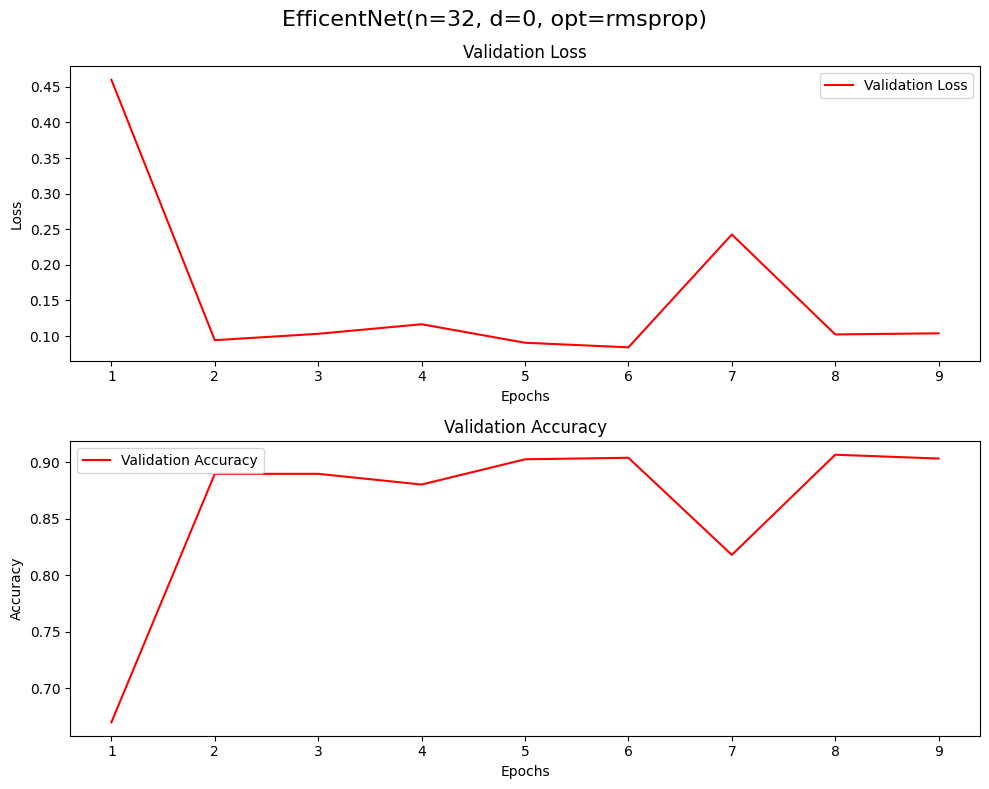

In [42]:
# missing training metrics, plot only validation

def make_graphs(obj, title):
    epochs = len(obj.history['val_loss'])
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=16)  # Title for the whole figure
    make_graphs_loss(obj, epochs, axes[0])
    make_graphs_accuracy(obj, epochs, axes[1])
    plt.tight_layout()

def make_graphs_loss(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    val_acc = obj.history['val_loss']
    # Now make plot
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Loss', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Validation Loss')
    ax.legend()

def make_graphs_accuracy(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    val_acc = obj.history['val_accuracy']
    # Now make plot
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Accuracy', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Validation Accuracy')
    ax.legend()

simplified_best_hist = SimplifiedHistory({
    'val_loss': best_hist['val_loss'],
    'val_accuracy': best_hist['val_accuracy']
})
make_graphs(simplified_best_hist, best_id[3:])

Xception:

In [43]:
# run once before doing any batches. will overwrite current work.
# run after finshing EfficentNet
running_xcept_hists_list = []
hist_id = 0
# fix not storing training data. simplehist mimic function.

In [48]:
# What we loop through. manually do random-search (5/8 coverage) this time around to save time 
# optimizers = ["rmsprop", "adam"]
optimizers = ["adam"]
# total_neurons = [16, 32, 64, 128]
total_neurons = [64]
drops = [0, .25, .5]

xcept_hists_list = []

# Now loop and make graphs
for opt in optimizers:
    for neuron in total_neurons:
        for dropout in drops:
            # make n fit
            id = f"{hist_id}, Xcept(n={neuron}, d={dropout}, opt={opt})"
            print(id)
            xcept_hist = make_n_fit_Xcept(neuron, dropout, opt)
            xcept_hists_list.append((id, xcept_hist))
            hist_id += 1
print("Done.")

3, Xcept(n=64, d=0, opt=adam)
4, Xcept(n=64, d=0.25, opt=adam)


I0000 00:00:1717208208.387878    5954 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5139', 4 bytes spill stores, 4 bytes spill loads



5, Xcept(n=64, d=0.5, opt=adam)
Done.


In [49]:
# work in batches
for list in xcept_hists_list:
    running_xcept_hists_list.append(list)
print(len(running_xcept_hists_list))

3


In [50]:
# Serialize the histories dictionary to JSON
serialized_histories = {}

for description, history in running_xcept_hists_list:
    history_dict = {
        'description': description,
        'loss': history.history.get('loss', []),
        'val_loss': history.history.get('val_loss', []),
        'accuracy': history.history.get('accuracy', []),
        'val_accuracy': history.history.get('val_accuracy', [])
    }
    serialized_histories[description] = history_dict

with open('running_xcept_hists_list.json', 'w') as json_file:
    json.dump(serialized_histories, json_file, indent=4)

print("Data successfully written to running_xcept_hists_list.json")

Data successfully written to running_xcept_hists_list.json


In [51]:
# Read the serialized histories from the JSON file
with open('running_xcept_hists_list.json', 'r') as json_file:
    serialized_histories = json.load(json_file)

In [53]:
# Rebuild running_xcept_hists_list by mimicing history object
class SimplifiedHistory:
    def __init__(self, history_data):
        self.history = history_data

def rebuild_running_hists_list(json_filename):
    with open(json_filename, 'r') as json_file:
        serialized_histories = json.load(json_file)
    
    running_hists_list = []
    for description, history_data in serialized_histories.items():
        simplified_history = SimplifiedHistory({
            'loss': history_data.get('loss', []),
            'val_loss': history_data.get('val_loss', []),
            'accuracy': history_data.get('accuracy', []),
            'val_accuracy': history_data.get('val_accuracy', [])
        })
        running_hists_list.append((description, simplified_history))
    
    return running_hists_list

running_xcept_hists_list = rebuild_running_hists_list('running_xcept_hists_list.json')
hist_id = len(running_xcept_hists_list)

# Print the first history's accuracy to verify
first_description, first_history = running_xcept_hists_list[0]
print(f"Description: {first_description}")
print(f"Training Accuracy: {first_history.history['accuracy']}")

Description: 3, Xcept(n=64, d=0, opt=adam)
Training Accuracy: [0.7472850680351257, 0.9233031868934631, 0.9588235020637512, 0.9746606349945068]


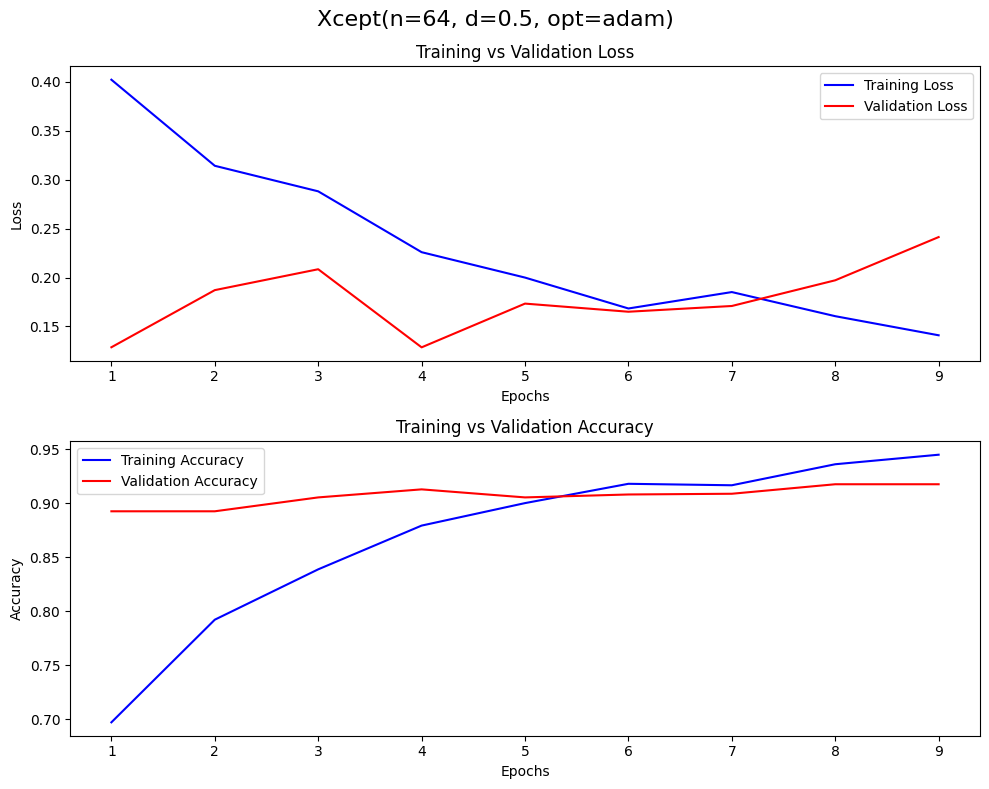

In [59]:
best_validation_accuracy = 0
best_index = -1

for id, hist in serialized_histories.items():
    validation_accuracy = hist['val_accuracy']
    max_val_acc = max(validation_accuracy)
    if max_val_acc > best_validation_accuracy:
        best_validation_accuracy = max_val_acc
        best_hist = hist
        best_id = id

simplified_best_hist = SimplifiedHistory({
    'loss': best_hist['loss'],
    'accuracy': best_hist['accuracy'],
    'val_loss': best_hist['val_loss'],
    'val_accuracy': best_hist['val_accuracy']
})
make_graphs(simplified_best_hist, best_id[3:])